**The Task results for the tutorial 3 is at the end of the code down below**

In [2]:
# Step 1 — Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [4]:
# Step 2 — Loading and Preprocessing the MNIST Dataset

# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
# Step 3 — Building the Neural Network Model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\engrm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Step 4 — Compiling the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Step 5 — Training the Model
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8612 - loss: 0.4757 - val_accuracy: 0.9605 - val_loss: 0.1353
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9648 - loss: 0.1183 - val_accuracy: 0.9666 - val_loss: 0.1076
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9768 - loss: 0.0748 - val_accuracy: 0.9690 - val_loss: 0.1033
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9819 - loss: 0.0555 - val_accuracy: 0.9703 - val_loss: 0.1043
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9712 - val_loss: 0.1039
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9719 - val_loss: 0.1049
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0303 - val_accuracy: 0.9707 - val_loss: 0.1075
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9931 - loss: 0.0211 - 

In [8]:
# Step 6 — Evaluating the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1007
Test Accuracy: 0.9764


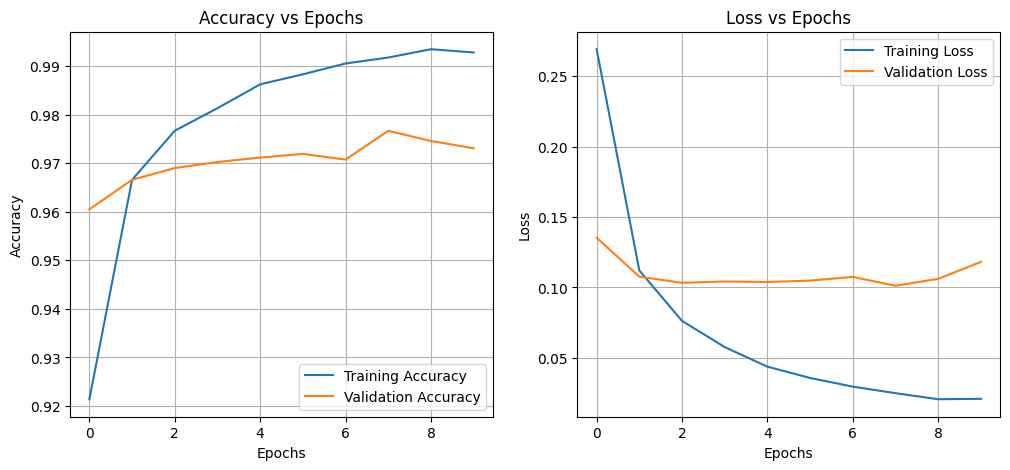

In [9]:
# Step 7 — Visualizing Training and Validation Performance
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


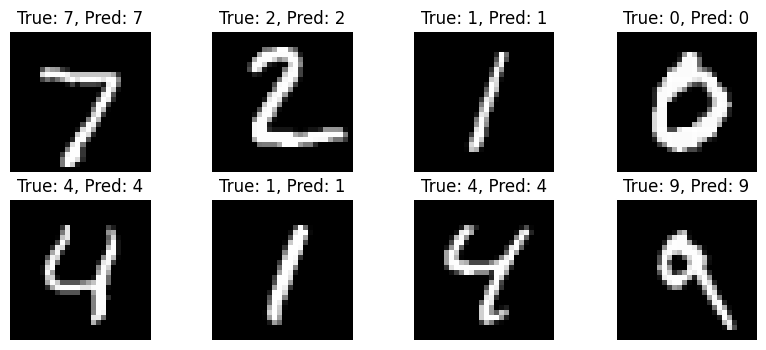

In [10]:
# Step 8 — Making Predictions and Visualizing Results
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

Tasks of the Tutorial 3

Task 1 — Different Architectures & Activations

In [11]:
architectures = [
    [128, 64],
    [256, 128],
    [256, 128, 64],
    [512, 256, 128]
]

activations = ['relu', 'tanh', 'sigmoid']
results = {}

for arch in architectures:
    for act in activations:
        print(f"\nTraining model with layers {arch} and activation {act}")
        model = keras.Sequential()
        model.add(layers.Flatten(input_shape=(28, 28)))
        
        for units in arch:
            model.add(layers.Dense(units, activation=act))
        
        model.add(layers.Dense(10, activation='softmax'))
        
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        history = model.fit(
            X_train, y_train_cat,
            epochs=10,
            batch_size=32,
            validation_split=0.2,
            verbose=0
        )
        
        test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
        results[(tuple(arch), act)] = test_acc
        print(f"Test Accuracy: {test_acc:.4f}")



Training model with layers [128, 64] and activation relu
Test Accuracy: 0.9791

Training model with layers [128, 64] and activation tanh
Test Accuracy: 0.9774

Training model with layers [128, 64] and activation sigmoid
Test Accuracy: 0.9779

Training model with layers [256, 128] and activation relu
Test Accuracy: 0.9762

Training model with layers [256, 128] and activation tanh
Test Accuracy: 0.9745

Training model with layers [256, 128] and activation sigmoid
Test Accuracy: 0.9793

Training model with layers [256, 128, 64] and activation relu
Test Accuracy: 0.9741

Training model with layers [256, 128, 64] and activation tanh
Test Accuracy: 0.9730

Training model with layers [256, 128, 64] and activation sigmoid
Test Accuracy: 0.9738

Training model with layers [512, 256, 128] and activation relu
Test Accuracy: 0.9781

Training model with layers [512, 256, 128] and activation tanh
Test Accuracy: 0.9711

Training model with layers [512, 256, 128] and activation sigmoid
Test Accuracy:

Task 2 — Compare Different Optimizers

In [12]:
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=0.01),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': keras.optimizers.Adam(learning_rate=0.001)
}

optimizer_results = {}

for opt_name, opt in optimizers.items():
    print(f"\nTraining with optimizer: {opt_name}")
    
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train_cat,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
    optimizer_results[opt_name] = test_acc
    print(f"Test Accuracy: {test_acc:.4f}")



Training with optimizer: SGD
Test Accuracy: 0.9626

Training with optimizer: RMSprop
Test Accuracy: 0.9768

Training with optimizer: Adam
Test Accuracy: 0.9754


Task 3 — Early Stopping

In [13]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8856 - loss: 0.3967 - val_accuracy: 0.9636 - val_loss: 0.1215
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9706 - loss: 0.0971 - val_accuracy: 0.9685 - val_loss: 0.1029
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9813 - loss: 0.0596 - val_accuracy: 0.9709 - val_loss: 0.1011
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9859 - loss: 0.0426 - val_accuracy: 0.9730 - val_loss: 0.0900
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9888 - loss: 0.0328 - val_accuracy: 0.9750 - val_loss: 0.0977
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0254 - val_accuracy: 0.9735 - val_loss: 0.1068
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9929 - loss: 0.0203 - val_accuracy: 0.9756 - val_loss: 0.1002


Task 4 — Regularization (Dropout + L2)

In [14]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7546 - loss: 0.7986 - val_accuracy: 0.9492 - val_loss: 0.2276
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9237 - loss: 0.3167 - val_accuracy: 0.9617 - val_loss: 0.1890
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9387 - loss: 0.2728 - val_accuracy: 0.9677 - val_loss: 0.1806
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9458 - loss: 0.2496 - val_accuracy: 0.9677 - val_loss: 0.1855
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9506 - loss: 0.2405 - val_accuracy: 0.9703 - val_loss: 0.1796
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9546 - loss: 0.2346 - val_accuracy: 0.9707 - val_loss: 0.1799
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9543 - loss: 0.2353 - val_accuracy: 0.9722 - val_loss: 0.1766
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9574 - loss: 0.2258 - 

Tutorial 3 in PyTorch [Original Tutorial Implementation in PyTorch]

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split


Load & Preprocess MNIST

In [31]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


Validation Split (20%)

In [32]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Build Neural Network (Same Architecture as Tutorial)

In [33]:
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        return self.model(x)

model = MNISTModel()


Compile Model

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Training Function

In [36]:
def train_model(model, train_loader, val_loader, epochs=10):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_losses.append(running_loss/len(train_loader))
        train_accs.append(100 * correct/total)
        
        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_losses.append(val_loss/len(val_loader))
        val_accs.append(100 * correct/total)
        
        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Acc: {train_accs[-1]:.2f}% "
              f"Val Acc: {val_accs[-1]:.2f}%")

    return train_losses, val_losses, train_accs, val_accs


In [37]:
train_losses, val_losses, train_accs, val_accs = train_model(model, train_loader, val_loader, epochs=10)


Epoch [1/10] Train Acc: 90.53% Val Acc: 94.72%
Epoch [2/10] Train Acc: 95.99% Val Acc: 96.36%
Epoch [3/10] Train Acc: 97.12% Val Acc: 96.57%
Epoch [4/10] Train Acc: 97.85% Val Acc: 96.87%
Epoch [5/10] Train Acc: 98.26% Val Acc: 96.92%
Epoch [6/10] Train Acc: 98.55% Val Acc: 97.09%
Epoch [7/10] Train Acc: 98.85% Val Acc: 97.36%
Epoch [8/10] Train Acc: 98.98% Val Acc: 97.39%
Epoch [9/10] Train Acc: 99.24% Val Acc: 97.37%
Epoch [10/10] Train Acc: 99.38% Val Acc: 97.49%


Evaluate on Test Data

In [38]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print("Test Accuracy:", 100 * correct / total)

test_model(model, test_loader)


Test Accuracy: 97.81


Plot Accuracy & Loss Curves

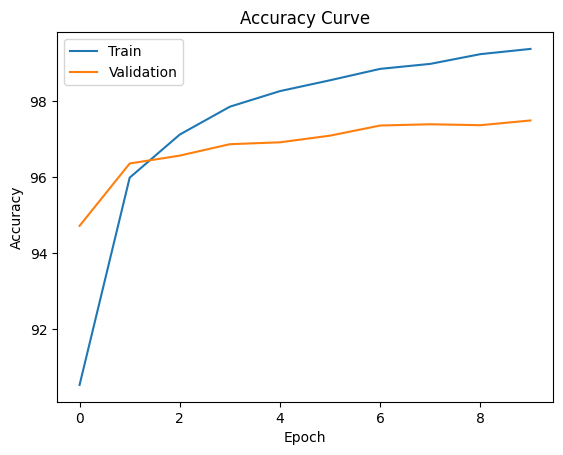

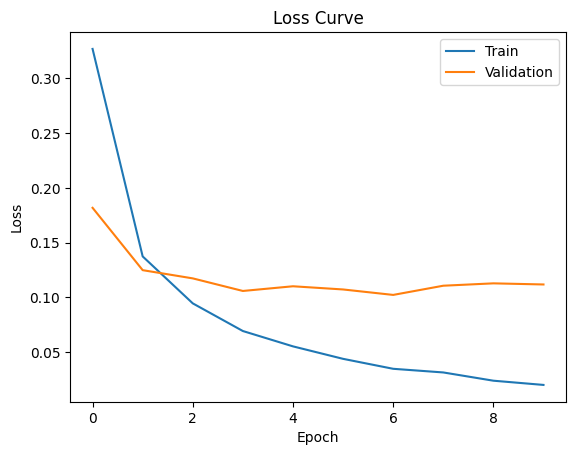

In [39]:
plt.figure()
plt.plot(train_accs)
plt.plot(val_accs)
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.figure()
plt.plot(train_losses)
plt.plot(val_losses)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


Visualize Predictions

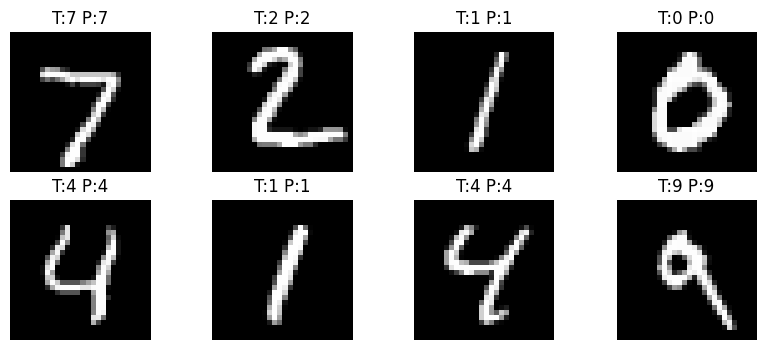

In [40]:
images, labels = next(iter(test_loader))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"T:{labels[i]} P:{predicted[i]}")
    plt.axis('off')
plt.show()


TASKS

Different Architectures [with ReLU]

In [41]:
class BiggerModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),                          #for tanh (just replace ReLU with tanh)
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        return self.model(x)


Different Architectures [with tanh]

In [43]:
class BiggerModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.Tanh(),                          #for tanh (just replace ReLU with tanh)
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        return self.model(x)


Compare Optimizers

In [44]:
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [45]:
optimizer = optim.RMSprop(model.parameters(), lr=0.001)


In [46]:
optimizer = optim.Adam(model.parameters(), lr=0.001)


Early Stopping Implementation

In [47]:
patience = 3
best_loss = float('inf')
counter = 0

for epoch in range(50):
    # training code
    
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
    else:
        counter += 1
        
    if counter >= patience:
        print("Early stopping triggered")
        break


Early stopping triggered


                            FINAL BEST MODEL — PyTorch Implementation

Epoch [1/20] Train Acc: 86.91% Val Acc: 93.97%
Epoch [2/20] Train Acc: 93.07% Val Acc: 95.29%
Epoch [3/20] Train Acc: 94.25% Val Acc: 95.52%
Epoch [4/20] Train Acc: 94.72% Val Acc: 96.10%
Epoch [5/20] Train Acc: 94.93% Val Acc: 96.44%
Epoch [6/20] Train Acc: 95.26% Val Acc: 96.43%
Epoch [7/20] Train Acc: 95.25% Val Acc: 96.79%
Epoch [8/20] Train Acc: 95.42% Val Acc: 96.42%
Epoch [9/20] Train Acc: 95.43% Val Acc: 96.72%
Epoch [10/20] Train Acc: 95.55% Val Acc: 96.63%
Epoch [11/20] Train Acc: 95.56% Val Acc: 96.61%
Epoch [12/20] Train Acc: 95.55% Val Acc: 96.74%
Early stopping triggered!
Final Test Accuracy: 97.12


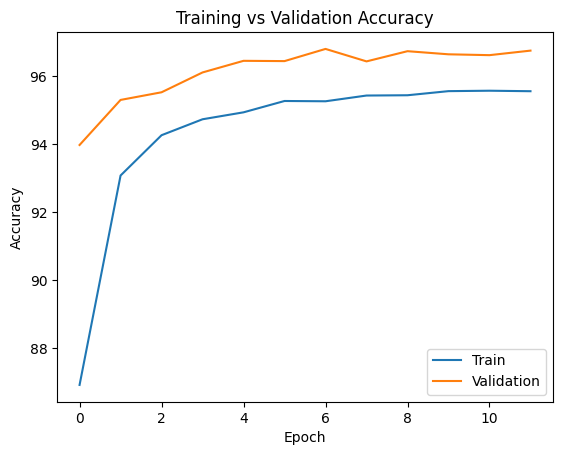

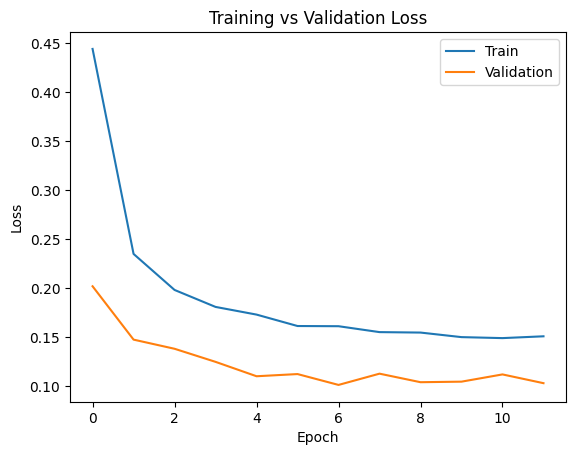

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split

transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# 80% train, 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class BestMNISTModel(nn.Module):
    def __init__(self):
        super(BestMNISTModel, self).__init__()
        
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        return self.model(x)

model = BestMNISTModel()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(
    model.parameters(),
    lr=0.001,
    weight_decay=0.001  # L2 Regularization
)

def train_model(model, train_loader, val_loader, epochs=20, patience=5):
    
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    
    best_val_loss = float('inf')
    counter = 0
    
    for epoch in range(epochs):
        # ----- Training -----
        model.train()
        running_loss = 0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # ----- Validation -----
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss /= len(val_loader)
        val_acc = 100 * correct / total
        
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Acc: {train_acc:.2f}% "
              f"Val Acc: {val_acc:.2f}%")
        
        # ----- Early Stopping -----
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
        
        if counter >= patience:
            print("Early stopping triggered!")
            break
    
    return train_losses, val_losses, train_accs, val_accs


train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, epochs=20, patience=5
)


def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print("Final Test Accuracy:", 100 * correct / total)

test_model(model, test_loader)


plt.figure()
plt.plot(train_accs)
plt.plot(val_accs)
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


plt.figure()
plt.plot(train_losses)
plt.plot(val_losses)
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()
